In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# import a CSV file into a Pandas DataFrame

filename = 'prem19_20.csv'
data = pd.read_csv(filename)
prem_19full = pd.DataFrame(data)
prem_19full.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [4]:
#Clean data to get relevant columns

prem_20_stats = prem_19full.loc[:, ["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "Referee", "HS", "AS", "HY", "AY", "HR", "AR", "AvgH", "AvgD", "AvgA", "Avg>2.5", "Avg<2.5"]]
prem_20_stats.sort_values(by =["HomeTeam"])

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HY,AY,HR,AR,AvgH,AvgD,AvgA,Avg>2.5,Avg<2.5
121,23/11/2019,Arsenal,Southampton,2,2,D,S Attwell,12,21,6,2,0,0,1.47,4.75,6.55,1.47,2.67
354,15/07/2020,Arsenal,Liverpool,2,1,H,P Tierney,3,24,3,1,0,0,3.89,3.89,1.89,1.58,2.41
257,16/02/2020,Arsenal,Newcastle,4,0,H,L Mason,15,10,2,0,0,0,1.43,4.60,7.72,1.72,2.13
268,23/02/2020,Arsenal,Everton,3,2,H,S Attwell,9,17,0,4,0,0,2.04,3.60,3.63,1.73,2.11
220,18/01/2020,Arsenal,Sheffield United,1,1,D,M Dean,11,12,1,2,0,0,1.85,3.61,4.46,1.99,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,19/10/2019,Wolves,Southampton,1,1,D,P Bankes,4,14,3,2,0,0,1.85,3.58,4.52,2.09,1.76
323,04/07/2020,Wolves,Arsenal,0,2,A,M Oliver,10,8,2,4,0,0,2.27,3.30,3.32,2.10,1.75
305,24/06/2020,Wolves,Bournemouth,1,0,H,M Oliver,10,4,3,3,0,0,1.58,4.03,6.11,2.07,1.77
215,11/01/2020,Wolves,Newcastle,1,1,D,P Bankes,9,5,0,3,0,0,1.46,4.35,7.91,2.01,1.82


In [6]:
#check for missing/null values 

prem_20_stats.isna().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
Referee     0
HS          0
AS          0
HY          0
AY          0
HR          0
AR          0
AvgH        0
AvgD        0
AvgA        0
Avg>2.5     0
Avg<2.5     0
dtype: int64

In [36]:
# work out percentage chance of home and away win

prem_20_stats["Home%Chance"] = (1 / prem_20_stats["AvgH"])*100
prem_20_stats["Away%Chance"] = (1 / prem_20_stats["AvgA"])*100
prem_20_stats["Over2.5%Chance"] = (1 / prem_20_stats["Avg>2.5"])*100
prem_20_stats["Total Goals"] = prem_20_stats["FTHG"] + prem_20_stats["FTAG"]
prem_20_stats

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HY,...,AR,AvgH,AvgD,AvgA,Avg>2.5,Avg<2.5,Home%Chance,Away%Chance,Over2.5%Chance,Total Goals
0,09/08/2019,Liverpool,Norwich,4,1,H,M Oliver,15,12,0,...,0,1.14,8.75,19.83,1.41,2.92,87.719298,5.042864,70.921986,5
1,10/08/2019,West Ham,Man City,0,5,A,M Dean,5,14,2,...,0,11.84,6.28,1.25,1.48,2.65,8.445946,80.000000,67.567568,5
2,10/08/2019,Bournemouth,Sheffield United,1,1,D,K Friend,13,8,2,...,0,2.01,3.53,3.83,1.90,1.93,49.751244,26.109661,52.631579,2
3,10/08/2019,Burnley,Southampton,3,0,H,G Scott,10,11,0,...,0,2.68,3.22,2.78,2.12,1.73,37.313433,35.971223,47.169811,3
4,10/08/2019,Crystal Palace,Everton,0,0,D,J Moss,6,10,2,...,1,3.13,3.27,2.40,2.18,1.70,31.948882,41.666667,45.871560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,26/07/2020,Leicester,Man United,0,2,A,M Atkinson,14,7,1,...,0,3.17,3.49,2.24,1.85,1.99,31.545741,44.642857,54.054054,2
376,26/07/2020,Man City,Norwich,5,0,H,C Pawson,31,5,1,...,0,1.07,12.80,30.42,1.21,4.36,93.457944,3.287311,82.644628,5
377,26/07/2020,Newcastle,Liverpool,1,3,A,A Taylor,3,14,1,...,0,7.60,4.99,1.40,1.54,2.49,13.157895,71.428571,64.935065,4
378,26/07/2020,Southampton,Sheffield United,3,1,H,P Bankes,13,5,0,...,0,2.18,3.47,3.34,1.87,1.95,45.871560,29.940120,53.475936,4


Text(0.5, 1.0, 'fig 6. 2020 Home Goals Histogram')

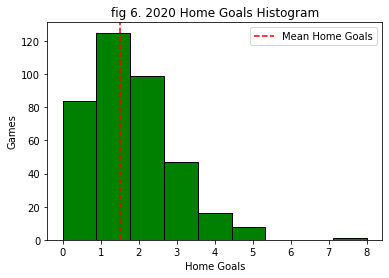

In [54]:
#home goals histogram

FTHG = prem_20_stats["FTHG"]
mean_fthg = FTHG.mean()
plt.hist(FTHG, bins = 9, color = "green", edgecolor= "black")
plt.axvline(mean_fthg, color = "red", label = "Mean Home Goals", linestyle = "dashed")
plt.legend(loc= "upper right")
plt.ylabel("Games")
plt.xlabel("Home Goals")
plt.title("fig 6. 2020 Home Goals Histogram")

In [10]:
# find average number of home goals


mean_fthg

1.5157894736842106

Text(0.5, 1.0, 'fig 7. 2020 Away Goals Histogram')

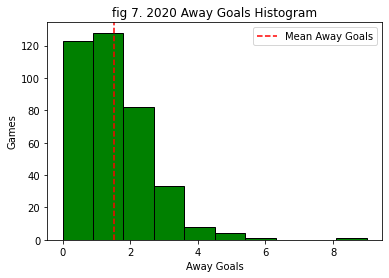

In [47]:
# Away goals histogram


FTAG = prem_20_stats["FTAG"]
mean_ftag = FTAG.mean()
plt.hist(FTAG, bins = 10, color = "green", edgecolor= "black")
plt.axvline(mean_fthg, color = "red", label = "Mean Away Goals", linestyle = "dashed")
plt.legend(loc= "upper right")
plt.ylabel("Games")
plt.xlabel("Away Goals")
plt.title("fig 7. 2020 Away Goals Histogram")

In [11]:
# find average number of away goals


mean_ftag

1.2052631578947368

In [14]:
#average home % chance
mean_home_chance = prem_20_stats["Home%Chance"].mean()
mean_home_chance


45.77424127984001

In [15]:
# expected home wins
exp_home_wins = (380 * mean_home_chance) / 100
exp_home_wins

173.94211686339204

In [59]:
#actual home wins using numpy array


home_wins = prem_20_stats[prem_20_stats["FTR"]=="H"]
np_home_wins = np.array(home_wins)
np_home_wins.shape

(172, 22)

In [17]:
#average away % chance
mean_away_chance = prem_20_stats["Away%Chance"].mean()
mean_away_chance

33.43032077476332

In [18]:
# expected away wins
exp_away_wins = (380 * mean_away_chance) / 100
exp_away_wins

127.03521894410059

In [58]:
#actual away wins using numpy array

away_wins = prem_20_stats[prem_20_stats["FTR"]=="A"]
np_away_wins = np.array(away_wins)
np_away_wins.shape

(116, 22)

In [37]:
# average chance of over 2.5 goals
mean_over_2_5_chance = prem_20_stats["Over2.5%Chance"].mean()
mean_over_2_5_chance

56.87129062984567

In [38]:
# expected over 2.5 goals
exp_over_2_5 = (380 * mean_over_2_5_chance) / 100
exp_over_2_5

216.11090439341353

In [60]:
# actual over 2.5 goals using numpy array
over_2_5 = prem_20_stats[prem_20_stats["Total Goals"] > 2.5]
np_over_2_5 = np.array(over_2_5)
np_over_2_5.shape

(198, 22)

In [55]:
# create dictionary with expected and actual wins

results = {"Home xWins" : 174, "Home aWins" : 172, "Away xWins" : 127, "Away aWins" : 116, "xOver2.5" : 216, "aOver2.5" : 198}
results

{'Home xWins': 174,
 'Home aWins': 172,
 'Away xWins': 127,
 'Away aWins': 116,
 'xOver2.5': 216,
 'aOver2.5': 198}

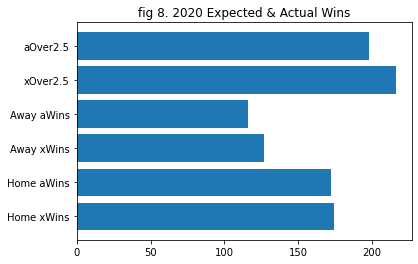

In [56]:
# Expected & Actual Wins


names = list(results.keys())
values = list(results.values())
plt.barh(range(len(results)), values, tick_label=names)
plt.title("fig 8. 2020 Expected & Actual Wins")
plt.show()

In [24]:
# getting referee stats

ref_20_stats = prem_19full.loc[:, ["Referee", "HY", "AY", "HR", "AR"]]
ref_20_stats

,Referee,HY,AY,HR,AR
0,M Oliver,0,2,0,0
1,M Dean,2,2,0,0
2,K Friend,2,1,0,0
3,G Scott,0,0,0,0
4,J Moss,2,1,0,1
...,...,...,...,...,...
375,M Atkinson,1,4,1,0
376,C Pawson,1,1,0,0
377,A Taylor,1,0,0,0
378,P Bankes,0,1,0,0


In [25]:
# total cards per match

ref_20_stats["Total Cards"] = ref_20_stats["HY"] + ref_20_stats["AY"] + ref_20_stats["HR"] + ref_20_stats["AR"]
ref_20_stats

,Referee,HY,AY,HR,AR,Total Cards
0,M Oliver,0,2,0,0,2
1,M Dean,2,2,0,0,4
2,K Friend,2,1,0,0,3
3,G Scott,0,0,0,0,0
4,J Moss,2,1,0,1,4
...,...,...,...,...,...,...
375,M Atkinson,1,4,1,0,6
376,C Pawson,1,1,0,0,2
377,A Taylor,1,0,0,0,1
378,P Bankes,0,1,0,0,1


In [26]:
# average cards per game

mean_cards = ref_20_stats["Total Cards"].mean()
mean_cards


3.471052631578947

Text(0.5, 1.0, 'fig 9. 2021 Cards Per Game Histogram')

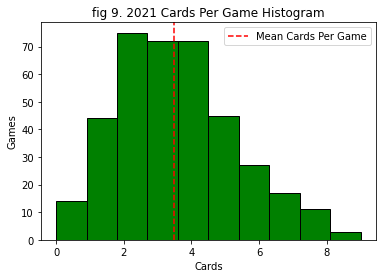

In [49]:
# cards per game histogram

CPG = ref_20_stats["Total Cards"]
mean_cpg = CPG.mean()
plt.hist(CPG, bins = 10, color = "green", edgecolor= "black")
plt.axvline(mean_cpg, color = "red", label = "Mean Cards Per Game", linestyle = "dashed")
plt.legend(loc= "upper right")
plt.ylabel("Games")
plt.xlabel("Cards")
plt.title("fig 9. 2021 Cards Per Game Histogram")

<function matplotlib.pyplot.show(close=None, block=None)>

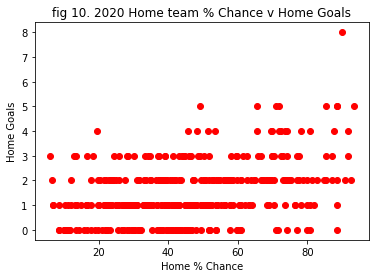

In [50]:
x = prem_20_stats["Home%Chance"]
y = prem_20_stats["FTHG"]

plt.scatter(x,y,c="Red")
plt.ylabel("Home Goals")
plt.xlabel("Home % Chance")
plt.title("fig 10. 2020 Home team % Chance v Home Goals")
plt.show